In [1]:
pip install numpy matplotlib imageio

Note: you may need to restart the kernel to use updated packages.


Procesando frame 1/20...


C:\Users\Justi\AppData\Local\Temp\ipykernel_21436\759663270.py:90: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(frame_path))


Procesando frame 2/20...
Procesando frame 3/20...
Procesando frame 4/20...
Procesando frame 5/20...
Procesando frame 6/20...
Procesando frame 7/20...
Procesando frame 8/20...
Procesando frame 9/20...
Procesando frame 10/20...
Procesando frame 11/20...
Procesando frame 12/20...
Procesando frame 13/20...
Procesando frame 14/20...
Procesando frame 15/20...
Procesando frame 16/20...
Procesando frame 17/20...
Procesando frame 18/20...
Procesando frame 19/20...
Procesando frame 20/20...
Animación guardada como 'hexagono_transformado.gif'


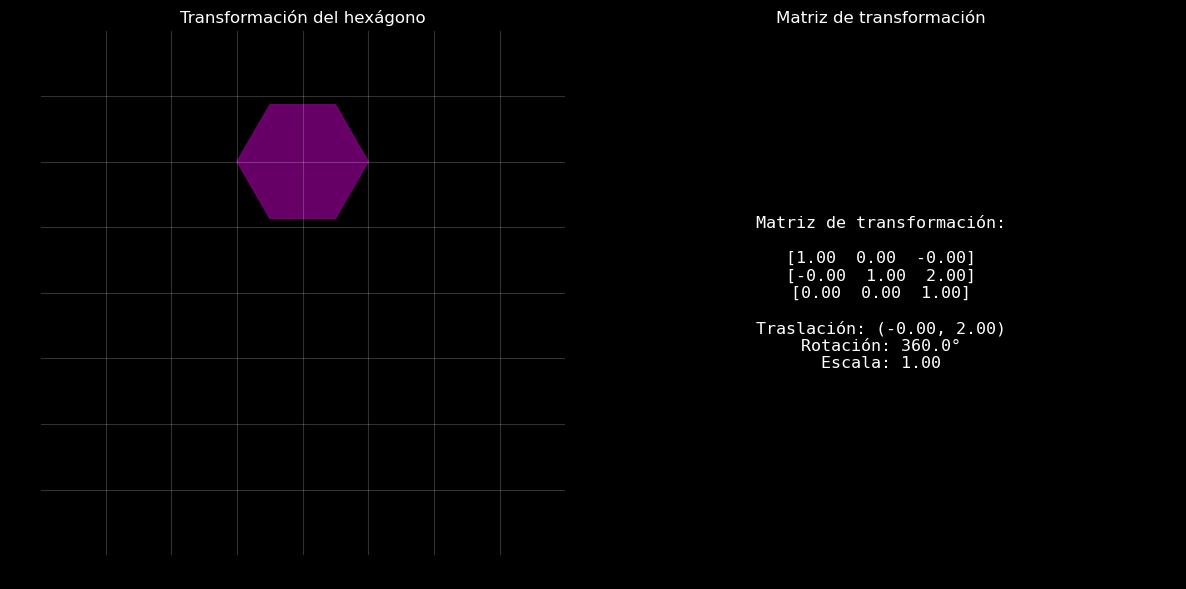

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def generar_hexagono(radio=1.0):
    angulos = np.linspace(0, 2 * np.pi, 7)
    x = radio * np.cos(angulos)
    y = radio * np.sin(angulos)
    return np.array([x, y])

def traslacion_matriz(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def rotacion_matriz(angulo_grados):
    angulo_rad = np.radians(angulo_grados)
    return np.array([[np.cos(angulo_rad), -np.sin(angulo_rad), 0],
                     [np.sin(angulo_rad),  np.cos(angulo_rad), 0],
                     [0, 0, 1]])

def escala_matriz(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

def aplicar_transformacion(puntos, matriz):
    puntos_h = np.vstack((puntos, np.ones(puntos.shape[1])))
    resultado_h = matriz @ puntos_h
    return resultado_h[:2, :]

hexagono = generar_hexagono()

num_frames = 20
frames = []
frames_dir = "frames_hex"
os.makedirs(frames_dir, exist_ok=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), facecolor='black')

for i in range(num_frames):
    print(f"Procesando frame {i+1}/{num_frames}...")
    t = i / (num_frames - 1)

    angulo = 360 * t
    escala_factor = 1 + 0.5 * np.sin(2 * np.pi * t)
    tx = 2 * np.sin(2 * np.pi * t)
    ty = 2 * np.cos(2 * np.pi * t)

    T = traslacion_matriz(tx, ty)
    R = rotacion_matriz(angulo)
    S = escala_matriz(escala_factor, escala_factor)
    M = T @ R @ S
    hexagono_transformado = aplicar_transformacion(hexagono, M)

    ax1.clear()
    ax2.clear()

    ax1.set_facecolor("black")
    ax2.set_facecolor("black")

    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-4, 4)
    ax1.set_aspect('equal')
    ax1.grid(True, color="white", alpha=0.2)
    ax1.set_title('Transformación del hexágono', color='white')

    # Hexágono transformado en morado
    ax1.fill(hexagono_transformado[0], hexagono_transformado[1], color='purple', alpha=0.8)

    # Mostrar matriz y datos en texto
    ax2.axis('off')
    ax2.set_title('Matriz de transformación', color='white')
    matriz_texto = "Matriz de transformación:\n\n"
    matriz_texto += f"[{M[0,0]:.2f}  {M[0,1]:.2f}  {M[0,2]:.2f}]\n"
    matriz_texto += f"[{M[1,0]:.2f}  {M[1,1]:.2f}  {M[1,2]:.2f}]\n"
    matriz_texto += f"[{M[2,0]:.2f}  {M[2,1]:.2f}  {M[2,2]:.2f}]"
    info_texto = f"\n\nTraslación: ({tx:.2f}, {ty:.2f})\nRotación: {angulo:.1f}°\nEscala: {escala_factor:.2f}"
    ax2.text(0.5, 0.5, matriz_texto + info_texto,
             fontsize=12, ha='center', va='center', family='monospace',
             bbox=dict(boxstyle='round', facecolor='black', alpha=0.8),
             color='white')

    frame_path = f"{frames_dir}/frame_{i:03d}.png"
    plt.tight_layout()
    plt.savefig(frame_path, facecolor='black')

    try:
        frames.append(imageio.imread(frame_path))
    except Exception as e:
        print(f"Error al leer frame {frame_path}: {e}")

gif_path = 'hexagono_transformado.gif'
try:
    imageio.mimsave(gif_path, frames, duration=100, loop=0)
    print(f"Animación guardada como '{gif_path}'")
except Exception as e:
    print(f"Error al crear GIF: {e}")

plt.show()